In [258]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from scipy import stats 
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [259]:
filename = 'Salary.csv'
dataset = read_csv(filename)
dataset.head()

,Registration Number,Gender,DOB,10Percentage,10Board,12Percentage,12Board,12Graduation,College ID,College Tier,...,Electrical Engg,Electronics And Semicon,Mechanical Engg,Telecom Engg,Agreeableness,Conscientiousness,Extraversion,Nueroticism,Openess To Experience,CTC
0,432376,F,19-02-1990,84.3,"Board of secondary education,Andhara pradesh",95.8,"board of intermediate education,ap",2007,3223,2.0,...,-1,-1,-1,-1,0.8128,0.9737,0.5269,1.35490,-0.4455,420000
1,432383,M,4/10/1989,85.4,CBSE,85.0,CBSE,2007,6058,2.0,...,-1,466,-1,-1,0.3789,-0.7335,1.2396,-0.10760,0.8637,500000
2,432390,F,3/8/1992,85.0,CBSE,68.2,CBSE,2010,1620,2.0,...,-1,-1,-1,-1,1.7109,0.2718,0.1637,-0.86820,0.6721,325000
3,432397,M,5/12/1989,85.6,CBSE,83.6,CBSE,2007,6569,1.0,...,-1,-1,-1,-1,0.3448,0.0464,-0.3440,-0.40780,-0.9194,1100000
4,432404,M,27-02-1991,NaN,CBSE,76.8,CBSE,2008,8760,NaN,...,-1,233,-1,-1,-0.2793,-0.8810,-1.0697,0.09163,-0.1295,200000


In [260]:
print(dataset.dtypes)
print('Dataset Shape:', dataset.shape)

Registration Number          int64
Gender                      object
DOB                         object
10Percentage               float64
10Board                     object
12Percentage               float64
12Board                     object
12Graduation                 int64
College ID                   int64
College Tier               float64
Deg                         object
Branch                      object
College GPA                float64
College City ID              int64
College City Tier            int64
College State               object
Grad Year                  float64
Joining date                object
Leaving date                object
Role                        object
Job City                    object
English                      int64
Logical                      int64
Quant                        int64
Domain                     float64
Civil Engg                   int64
Computer Programming         int64
Computer Science             int64
Electrical Engg     

le = LabelEncoder()
le.fit_transform(dataset[["Role"]])
Role_Name = le.classes_
le.fit_transform(dataset[["Gender"]])
Gender_Number = le.classes_
print(Gender_Number)
Role_df = pd.DataFrame({'Role Name':Role_Name})
Role_df

In [261]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#gbank['checking_balance'] = le.fit_transform(gbank['checking_balance'])

def Encoder(a):
    le = LabelEncoder()
    x = le.fit_transform(a)
    return x

dataset[["Gender"]] = Encoder(dataset[["Gender"]])
dataset[["Deg"]] = Encoder(dataset[["Deg"]])
dataset[["Branch"]] = Encoder(dataset[["Branch"]])
dataset[["Role"]] = Encoder(dataset[["Role"]])
dataset[["Job City"]] = Encoder(dataset[["Job City"]])

print(dataset[["Deg"]].head())
print(dataset[["Branch"]].head())
print(dataset[["Role"]].head())
print(dataset[["Job City"]].head())

   Deg
0    0
1    0
2    0
3    0
4    0
   Branch
0      10
1      21
2      33
3      10
4      21
   Role
0   298
1    16
2   349
3   302
4   121
   Job City
0        18
1        79
2        43
3        70
4       109


In [262]:
#dataset.to_csv('Salary-Encoded.csv', index=False)
dataset[["Role"]].nunique()

Role    388
dtype: int64

In [263]:
dataset = dataset.drop('DOB', axis = 1)
dataset = dataset.drop('Registration Number', axis = 1)
dataset = dataset.drop('Gender', axis =1)
dataset = dataset.drop('10Board', axis = 1)
dataset = dataset.drop('12Board', axis = 1)
dataset = dataset.drop('12Graduation', axis = 1)
dataset = dataset.drop('College ID', axis = 1)
dataset = dataset.drop('College City ID', axis = 1)
dataset = dataset.drop('College City Tier', axis = 1)
dataset = dataset.drop('Grad Year', axis = 1)
dataset = dataset.drop('Joining date', axis = 1)
dataset = dataset.drop('Leaving date', axis = 1)

In [264]:
dataset.head()

,10Percentage,12Percentage,College Tier,Deg,Branch,College GPA,College State,Role,Job City,English,...,Electrical Engg,Electronics And Semicon,Mechanical Engg,Telecom Engg,Agreeableness,Conscientiousness,Extraversion,Nueroticism,Openess To Experience,CTC
0,84.3,95.8,2.0,0,10,78.00,Andhra Pradesh,298,18,515,...,-1,-1,-1,-1,0.8128,0.9737,0.5269,1.35490,-0.4455,420000
1,85.4,85.0,2.0,0,21,70.06,Madhya Pradesh,16,79,695,...,-1,466,-1,-1,0.3789,-0.7335,1.2396,-0.10760,0.8637,500000
2,85.0,68.2,2.0,0,33,70.00,Uttar Pradesh,349,43,615,...,-1,-1,-1,-1,1.7109,0.2718,0.1637,-0.86820,0.6721,325000
3,85.6,83.6,1.0,0,10,74.64,Delhi,302,70,635,...,-1,-1,-1,-1,0.3448,0.0464,-0.3440,-0.40780,-0.9194,1100000
4,NaN,76.8,NaN,0,21,73.90,Uttar Pradesh,121,109,545,...,-1,233,-1,-1,-0.2793,-0.8810,-1.0697,0.09163,-0.1295,200000


In [265]:
Civil_Engg = dataset[["Civil Engg"]].values.T[0].tolist()
Computer_Programming = dataset[["Computer Programming"]].values.T[0].tolist()
Computer_Science = dataset[["Computer Science"]].values.T[0].tolist()
Electrical_Engg = dataset[["Electrical Engg"]].values.T[0].tolist()
Electronics_And_Semicon = dataset[["Electronics And Semicon"]].values.T[0].tolist()
Mechanical_Engg = dataset[["Mechanical Engg"]].values.T[0].tolist()
Telecom_Engg = dataset[["Telecom Engg"]].values.T[0].tolist()

a_percentile = []
for j in Civil_Engg:
    if j != -1:
        a_percentile.append((stats.percentileofscore(Civil_Engg,j,'rank'))/100)
    else:
        a_percentile.append(0)
        
b_percentile = []
for j in Computer_Programming:
    if j != -1:
        b_percentile.append((stats.percentileofscore(Computer_Programming,j,'rank'))/100)
    else:
        b_percentile.append(0)
              
c_percentile = []
for j in Computer_Science:
    if j != -1:
        c_percentile.append((stats.percentileofscore(Computer_Science,j,'rank'))/100)
    else:
        c_percentile.append(0)
        
d_percentile = []
for j in Electrical_Engg:
    if j != -1:
        d_percentile.append((stats.percentileofscore(Electrical_Engg,j,'rank'))/100)
    else:
        d_percentile.append(0)
        
e_percentile = []
for j in Electronics_And_Semicon:
    if j != -1:
        e_percentile.append((stats.percentileofscore(Electronics_And_Semicon,j,'rank'))/100)
    else:
        e_percentile.append(0)
        
f_percentile = []
for j in Mechanical_Engg:
    if j != -1:
        f_percentile.append((stats.percentileofscore(Mechanical_Engg,j,'rank'))/100)
    else:
        f_percentile.append(0)
        
g_percentile = []
for j in Telecom_Engg:
    if j != -1:
        g_percentile.append((stats.percentileofscore(Telecom_Engg,j,'rank'))/100)
    else:
        g_percentile.append(0)
        
a_percentile = pd.Series(a_percentile)
b_percentile = pd.Series(b_percentile)
c_percentile = pd.Series(c_percentile)
d_percentile = pd.Series(d_percentile)
e_percentile = pd.Series(e_percentile)
f_percentile = pd.Series(f_percentile)
g_percentile = pd.Series(g_percentile)

dataset.insert(loc=14, column='a_percentile', value=a_percentile)
dataset.insert(loc=15, column='b_percentile', value=b_percentile)
dataset.insert(loc=16, column='c_percentile', value=c_percentile)
dataset.insert(loc=17, column='d_percentile', value=d_percentile)
dataset.insert(loc=18, column='e_percentile', value=e_percentile)
dataset.insert(loc=19, column='f_percentile', value=f_percentile)
dataset.insert(loc=20, column='g_percentile', value=g_percentile)


In [266]:
Domain_New = []
import itertools
for i, row in dataset.iterrows():
    if row["Domain"] != -1:
       Domain_New.append(row["Domain"])
    else:
        a = max(row["a_percentile"],row["b_percentile"],row["c_percentile"],
                row["d_percentile"],row["e_percentile"],row["f_percentile"],row["g_percentile"])
        Domain_New.append(a)

Domain_New = pd.Series(Domain_New)
dataset.insert(loc=13, column='Domain_New', value=Domain_New)

dataset.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
10Percentage,84.3,85.4,85,85.6,NaN,89.92,86.08,92,90,NaN,88.6,81,83.6,60.8,NaN,69.54,85.8,NaN,65,79
12Percentage,95.8,85,68.2,83.6,76.8,87,67.5,91,NaN,NaN,NaN,NaN,NaN,NaN,79.9,64.43,74.8,66.66,64.8,62.2
College Tier,2,2,2,1,NaN,2,2,1,NaN,2,2,1,2,2,2,2,2,2,2,2
Deg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
Branch,10,21,33,10,21,21,13,39,23,21,10,33,20,21,34,33,21,9,13,10
College GPA,78,70.06,70,74.64,73.9,76.32,72.98,8.58,85.03,78,74.9,72.29,60,60,67.67,63,64.8,74.74,69.54,76.3
College State,Andhra Pradesh,Madhya Pradesh,Uttar Pradesh,Delhi,Uttar Pradesh,Karnataka,Karnataka,Tamil Nadu,Delhi,West Bengal,Madhya Pradesh,Madhya Pradesh,Maharashtra,Haryana,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,Delhi,Uttar Pradesh,Uttar Pradesh
Role,298,16,349,302,121,345,156,185,84,232,294,303,245,236,156,189,220,27,66,323
Job City,18,79,43,70,109,77,18,18,128,100,18,137,137,70,18,3,128,70,70,137
English,515,695,615,635,545,560,590,545,615,605,565,495,380,495,395,485,685,465,465,485


In [267]:
dataset.isnull().sum()

10Percentage               100
12Percentage                56
College Tier                50
Deg                          0
Branch                       0
College GPA                  0
College State                0
Role                         0
Job City                     0
English                      0
Logical                      0
Quant                        0
Domain                       0
Domain_New                   0
Civil Engg                   0
a_percentile                 0
b_percentile                 0
c_percentile                 0
d_percentile                 0
e_percentile                 0
f_percentile                 0
g_percentile                 0
Computer Programming         0
Computer Science             0
Electrical Engg              0
Electronics And Semicon      0
Mechanical Engg              0
Telecom Engg                 0
Agreeableness                0
Conscientiousness            0
Extraversion                 0
Nueroticism                  0
Openess 

In [268]:
dataset.describe()

,10Percentage,12Percentage,College Tier,Deg,Branch,College GPA,Role,Job City,English,Logical,...,Electrical Engg,Electronics And Semicon,Mechanical Engg,Telecom Engg,Agreeableness,Conscientiousness,Extraversion,Nueroticism,Openess To Experience,CTC
count,3398.000000,3442.000000,3448.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.00000,3498.000000,3498.000000,...,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3.498000e+03
mean,77.936004,74.403451,1.926624,0.207833,20.160091,71.469777,228.733562,74.12064,501.540595,501.876501,...,16.606061,96.439966,22.923385,32.444540,0.152952,-0.033599,0.012774,-0.172780,-0.132001,3.082258e+05
std,9.839156,10.938945,0.260790,0.744421,9.453169,8.273036,117.133431,52.19755,105.508693,86.951876,...,87.589998,158.332268,97.892665,105.523841,0.940577,1.031360,0.953810,1.013028,1.004269,2.203398e+05
min,43.000000,40.000000,1.000000,0.000000,0.000000,6.450000,0.000000,0.00000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-5.781600,-4.126700,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,72.000000,66.037500,2.000000,0.000000,13.000000,66.467500,152.000000,18.00000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.287100,-0.726400,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,79.000000,74.140000,2.000000,0.000000,21.000000,71.775000,252.000000,77.00000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.212400,0.046400,0.091400,-0.234400,-0.094300,3.000000e+05
75%,85.745000,82.382500,2.000000,0.000000,24.000000,76.300000,323.000000,126.00000,570.000000,565.000000,...,-1.000000,260.000000,-1.000000,-1.000000,0.812800,0.702700,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,3.000000,45.000000,99.930000,387.000000,207.00000,875.000000,795.000000,...,676.000000,612.000000,616.000000,548.000000,1.904800,1.995300,2.535400,3.352500,1.822400,4.000000e+06


In [269]:
dataset["College Tier"].dtypes

dtype('float64')

In [270]:
from sklearn.preprocessing import Imputer

values = dataset[["10Percentage"]].values
imputer = Imputer(missing_values='NaN', strategy='median')
dataset[["10Percentage"]] = imputer.fit_transform(values)

values = dataset[["12Percentage"]].values
imputer = Imputer(missing_values='NaN', strategy='median')
dataset[["12Percentage"]] = imputer.fit_transform(values)

values = dataset[["College Tier"]].values
imputer = Imputer(missing_values='NaN', strategy='median')
dataset[["College Tier"]] = imputer.fit_transform(values)

dataset.isnull().sum()

10Percentage               0
12Percentage               0
College Tier               0
Deg                        0
Branch                     0
College GPA                0
College State              0
Role                       0
Job City                   0
English                    0
Logical                    0
Quant                      0
Domain                     0
Domain_New                 0
Civil Engg                 0
a_percentile               0
b_percentile               0
c_percentile               0
d_percentile               0
e_percentile               0
f_percentile               0
g_percentile               0
Computer Programming       0
Computer Science           0
Electrical Engg            0
Electronics And Semicon    0
Mechanical Engg            0
Telecom Engg               0
Agreeableness              0
Conscientiousness          0
Extraversion               0
Nueroticism                0
Openess To Experience      0
CTC                        0
dtype: int64

In [271]:
dataset['College Tier'] = dataset['College Tier'].astype(np.int64)

In [272]:
dataset.columns.values.tolist()

['10Percentage',
 '12Percentage',
 'College Tier',
 'Deg',
 'Branch',
 'College GPA',
 'College State',
 'Role',
 'Job City',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'Domain_New',
 'Civil Engg',
 'a_percentile',
 'b_percentile',
 'c_percentile',
 'd_percentile',
 'e_percentile',
 'f_percentile',
 'g_percentile',
 'Computer Programming',
 'Computer Science',
 'Electrical Engg',
 'Electronics And Semicon',
 'Mechanical Engg',
 'Telecom Engg',
 'Agreeableness',
 'Conscientiousness',
 'Extraversion',
 'Nueroticism',
 'Openess To Experience',
 'CTC']

In [273]:
data = dataset[['10Percentage','12Percentage','College Tier','Deg','Branch','College GPA','Role','Job City','English',
               'Logical','Quant','Domain_New','Agreeableness','Conscientiousness','Extraversion','Nueroticism',
               'Openess To Experience','CTC']]

In [274]:
data.head()

,10Percentage,12Percentage,College Tier,Deg,Branch,College GPA,Role,Job City,English,Logical,Quant,Domain_New,Agreeableness,Conscientiousness,Extraversion,Nueroticism,Openess To Experience,CTC
0,84.3,95.8,2,0,10,78.00,298,18,515,585,525,0.635979,0.8128,0.9737,0.5269,1.35490,-0.4455,420000
1,85.4,85.0,2,0,21,70.06,16,79,695,610,780,0.960603,0.3789,-0.7335,1.2396,-0.10760,0.8637,500000
2,85.0,68.2,2,0,33,70.00,349,43,615,545,370,0.450877,1.7109,0.2718,0.1637,-0.86820,0.6721,325000
3,85.6,83.6,1,0,10,74.64,302,70,635,585,625,0.974396,0.3448,0.0464,-0.3440,-0.40780,-0.9194,1100000
4,79.0,76.8,2,0,21,73.90,121,109,545,625,465,0.124502,-0.2793,-0.8810,-1.0697,0.09163,-0.1295,200000


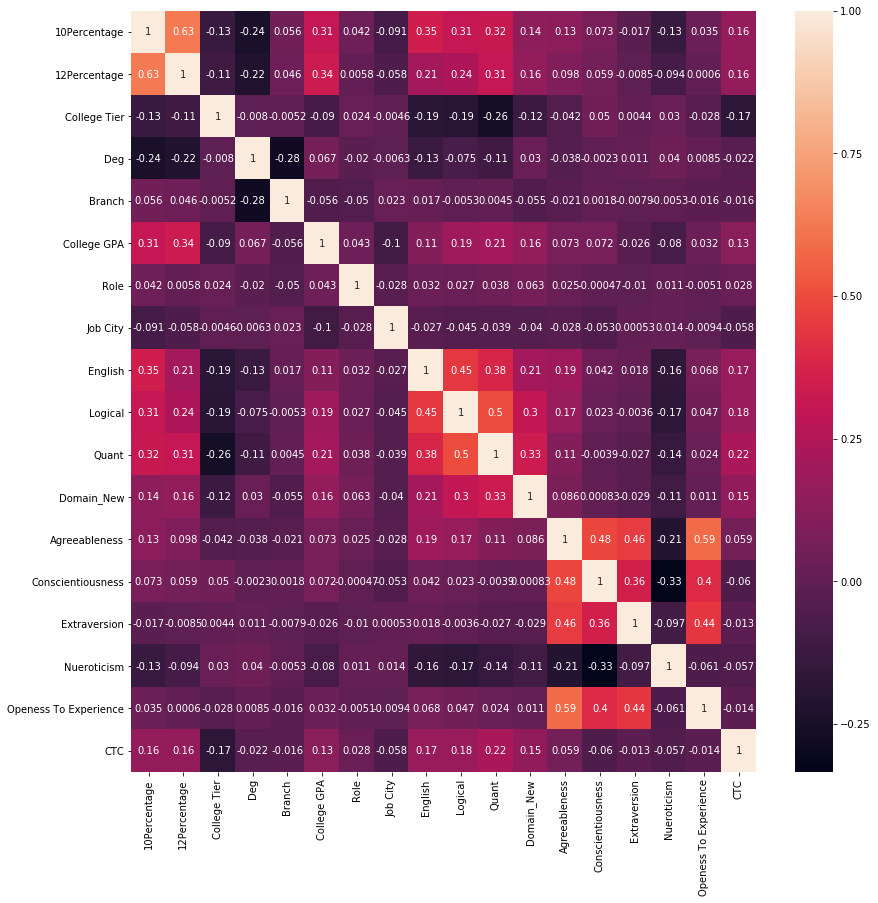

In [275]:
corr = data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
sn.heatmap(corr,annot=True)

Below are the variables that have good amount of correlation with the target variable 


10 th and 12th percentage - 0.16 and 0.16
College GPA - 0.13
English - 0.17
Logical - 0.18
Quant - 0.22
Domain - 0.15

All personality test have Negative correlation towards the target variable CTC 

We can also observe that all the scores are highly correlated among each other. So the asumption for the linear regression is 
voilated here, so PCA can be considered to solve this multi collinearity.

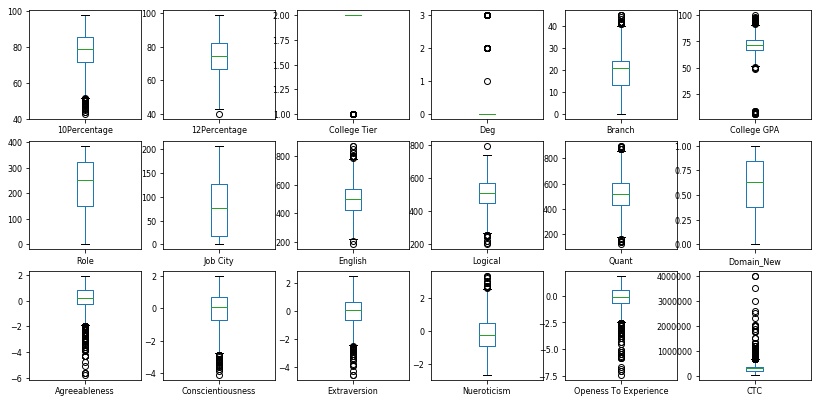

In [276]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(6,6), fontsize=8, figsize=(14,14))
pyplot.show()

We could infer from the box plot that there is huge number of ouliers present in most of the columns including the target column, which has to be treated. 

Lets first treat the outliers in the target column.

data[["CTC"]] = data[["CTC"]].apply(zscore)

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 3*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median().axis=0       
    return group

data[["CTC"]] = replace(data[["CTC"]])

Lets Scale the columns 
'10Percentage',
'12Percentage',
 'College GPA',
 'English',
 'Logical',
 'Quant',
 'Domain_New',
 'Agreeableness',
 'Conscientiousness',
 'Extraversion',
 'Nueroticism',
 'Openess To Experience' and perform a PCA on top of it to solve multi collinearity.

In [277]:
X = data[['10Percentage','12Percentage','College GPA','English','Logical','Quant','Domain_New','Agreeableness',
          'Conscientiousness','Extraversion','Nueroticism','Openess To Experience']]
Y = data[["CTC"]]
X.head()

,10Percentage,12Percentage,College GPA,English,Logical,Quant,Domain_New,Agreeableness,Conscientiousness,Extraversion,Nueroticism,Openess To Experience
0,84.3,95.8,78.00,515,585,525,0.635979,0.8128,0.9737,0.5269,1.35490,-0.4455
1,85.4,85.0,70.06,695,610,780,0.960603,0.3789,-0.7335,1.2396,-0.10760,0.8637
2,85.0,68.2,70.00,615,545,370,0.450877,1.7109,0.2718,0.1637,-0.86820,0.6721
3,85.6,83.6,74.64,635,585,625,0.974396,0.3448,0.0464,-0.3440,-0.40780,-0.9194
4,79.0,76.8,73.90,545,625,465,0.124502,-0.2793,-0.8810,-1.0697,0.09163,-0.1295


In [278]:
sc = StandardScaler()
X_std =  sc.fit_transform(X) 
print(X_std)

cov_matrix = np.cov(X_std.T)
#Compute the eigen vectors and values using linear algebra lambda decomposition

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

[[ 6.53101798e-01  1.97251092e+00  7.89451022e-01 ...  5.39100924e-01
   1.50824883e+00 -3.12210914e-01]
 [ 7.66530865e-01  9.77073756e-01 -1.70430613e-01 ...  1.28642154e+00
   6.43513604e-02  9.91610284e-01]
 [ 7.25283931e-01 -5.71384050e-01 -1.77684127e-01 ...  1.58257864e-01
  -6.86574052e-01  8.00797465e-01]
 ...
 [ 2.95284650e-01  1.14297995e+00  5.80308046e-01 ... -8.30654830e-01
   1.16084849e-01  4.74443809e-01]
 [ 1.47826863e-01  1.06924386e+00  3.66329395e-01 ... -8.30654830e-01
   1.16084849e-01 -3.12210914e-01]
 [-6.15241405e-01 -6.81988180e-01 -1.38660306e+00 ...  6.91249405e-01
   7.94114326e-05  7.89045945e-01]]
Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11
0,3.051517,2.286088,1.200828,0.995798,0.875504,0.342202,0.378497,0.707811,0.479529,0.496598,0.611456,0.577604


In [279]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print("Cumulative Variance Explained", cum_var_exp)
print("Eigen Values:")
pd.DataFrame(cum_var_exp).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11
0,25.422035,44.467325,54.47136,62.7673,70.061082,75.957825,81.051835,85.863829,90.000965,93.995897,97.149136,100.0


In [280]:
from sklearn.decomposition import PCA

pcamodel = PCA(n_components=9)
pcamodel.fit(X)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

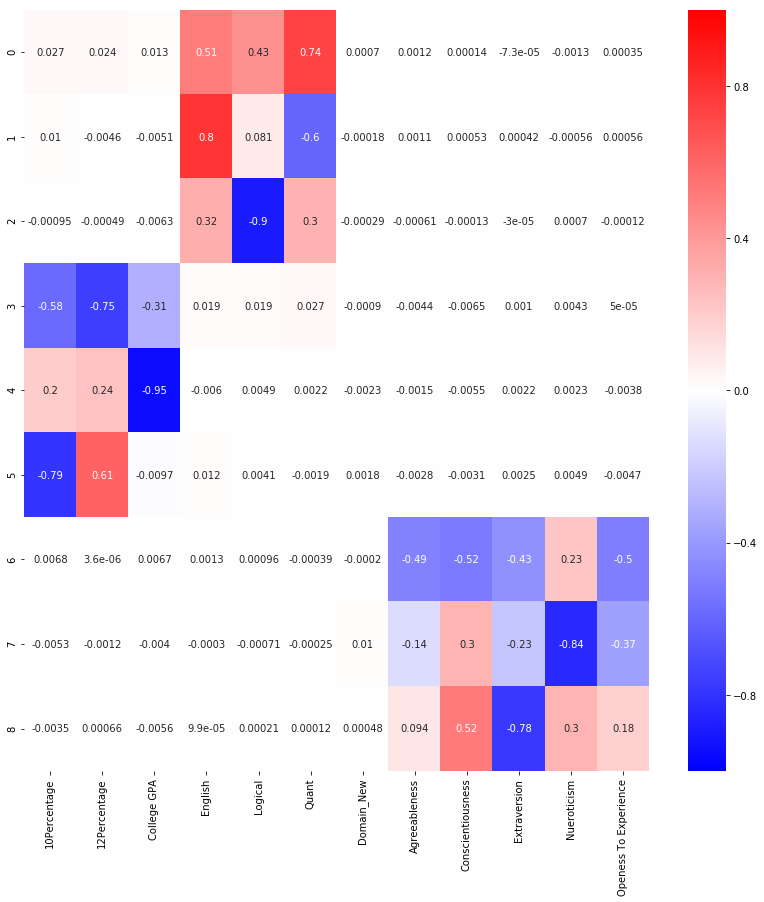

In [281]:
df_comp = pd.DataFrame(pcamodel.components_,columns=X.columns.values)
plt.figure(figsize=(14,14))
sn.heatmap(df_comp,cmap='bwr', annot=True,vmax=1,vmin=-1)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [283]:
X_train_reduced = PCA(n_components=9).fit_transform(X_train_std)
X_test_reduced = PCA(n_components=9).fit_transform(X_test_std)

In [284]:
regression_model = LinearRegression()
regression_model.fit(X_train_reduced, y_train)

SalaryPredictions = regression_model.predict(X_train_reduced)

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(SalaryPredictions, y_train))
rmse

#for idx, col_name in enumerate(X_train_reduced.columns):
#    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

207945.70550228993

In [285]:
print(regression_model.score(X_train_reduced,y_train))

0.07805931656397258


In [286]:
SalesPredictions = regression_model.predict(X_test_reduced)

from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(SalesPredictions, y_test))
rmse

221485.96766561765

In [287]:
avgSalary = np.mean(y_test)
rmsePct = rmse/avgSalary*100
print(rmsePct)
print("Accuracy:", 100 - rmsePct )

CTC    71.883244
dtype: float64
Accuracy: CTC    28.116756
dtype: float64


In [294]:
NNH = KNeighborsRegressor(n_neighbors= 21 , weights = 'uniform', metric='euclidean') 
NNH.fit(X_train_reduced, y_train)

SalaryPredictions = NNH.predict(X_train_reduced)

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(SalaryPredictions, y_train))
rmse

202154.69613535804

In [309]:
SalaryPredictions = NNH.predict(X_test_reduced)

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(SalaryPredictions, y_test))
rmse

224263.95067509267

In [308]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

model = lasso.fit(X_train_reduced,y_train)
SalaryPredictions = model.predict(X_train_reduced)
rmse = np.sqrt(mean_squared_error(SalaryPredictions, y_train))
print(rmse)

print ("Lasso model:", (lasso.coef_))

print(lasso.score(X_train_reduced, y_train))

207945.70550254532
Lasso model: [-27095.70524271  19879.23433647   9575.30491671  11429.20109261
  -5795.15473991   2255.80085813  10976.81820808  -8549.39555222
  15177.34397695]
0.07805931656170806


In [310]:
SalaryPredictions = model.predict(X_test_reduced)
rmse = np.sqrt(mean_squared_error(SalaryPredictions, y_test))
print(rmse)

print ("Lasso model:", (lasso.coef_))

print(lasso.score(X_test_reduced, y_test))

221485.92430225617
Lasso model: [-27095.70524271  19879.23433647   9575.30491671  11429.20109261
  -5795.15473991   2255.80085813  10976.81820808  -8549.39555222
  15177.34397695]
0.06280232578739631
